In [1]:
# CasADi and CASCLIK things
import casclik as cc
import casadi as cs
from urdf2casadi import converter
import time

# Plotting
from matplotlib import pyplot as plt
import common_plots
import nice_plotting

# Formation control
In this example we are attempting to control $n$ drones in formation. The drones are assumed to have a low-level controller that has velocity setpoints in Cartesian space.

In [10]:
n_drones = 5
p_list = []
centroid = cs.MX.zeros(3)
safe_dists = []
for i in range(n_drones):
    p_list += [cs.MX.sym("p_"+str(i),3)]
    centroid += p_list[-1]/n_drones
for i in range(n_drones):
    for j in range(n_drones):
        if i != j:
            safe_dists = cs.norm_2(p_list[i] - p_list[j])
t = cs.MX.sym("t")
dt = 0.1

In [11]:
# Trajectory of centroid
omega1 = 0.1
omega2 = 0.01
alpha1 = 0.5
alpha2 = 0.5
alpha3 = 0.5
# position on a sphere that rotates
centroid_des = cs.vertcat(
    alpha1*cs.cos(omega1*t),
    alpha2*cs.sin(omega1*t)*cs.cos(omega2*t),
    -alpha3*cs.sin(omega2*t)*cs.sin(omega1*t)
)
fcentroid_des = cs.Function("fcentroid_des", [t], [centroid_des])

<IPython.core.display.Javascript object>


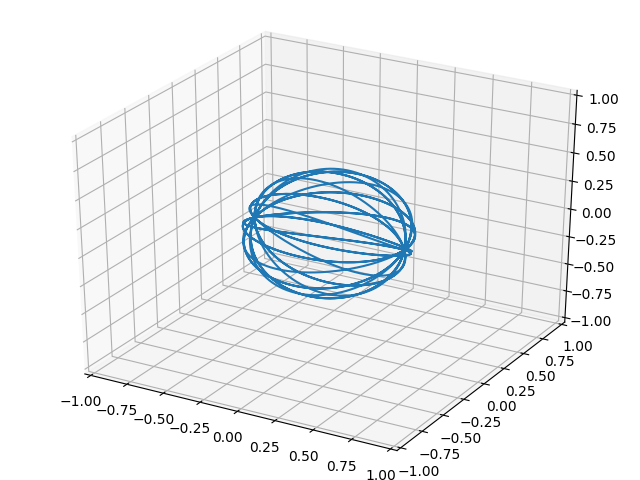

(-1, 1)

In [12]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())
timesteps = 10000
t_sim = cs.np.array([dt*i for i in range(timesteps)])
p_sim = cs.np.zeros((timesteps, 3))
for i in range(timesteps):
    p = fcentroid_des(t_sim[i])
    p_sim[i,:] = p.toarray()[:,0]
ax.plot(p_sim[:,0], p_sim[:,1], p_sim[:,2])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])